Normalized cut Image segmentation

In [2]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from numpy import array

Text(0.5, 1.0, 'original image')

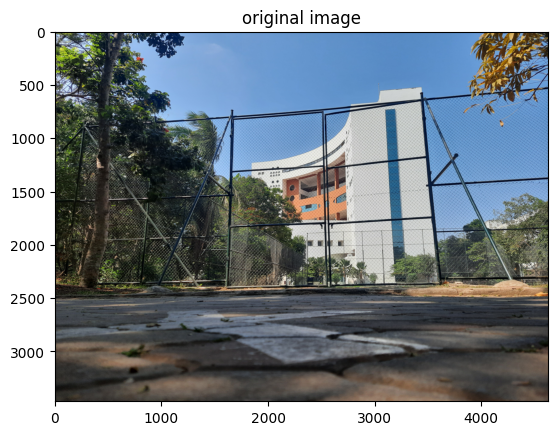

In [3]:
image = Image.open(r"D:\CMI\CMI_sem2\Linear_Algebra\LAA_project\image.jpg")  #Importing the image
img = array(image)
plt.imshow(img)
plt.title("original image")

In [4]:
img.shape

(3468, 4624, 3)

In [5]:
labels1 = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)

In [6]:
labels1.shape

(3468, 4624)

In [7]:
len(np.unique(labels1))

327

In [8]:
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
out1.shape
# Color of each pixel is the average pixel intensity of all pixels belonging to that segment.

(3468, 4624, 3)

In [9]:
# Creating a region adjacency graph

g = graph.rag_mean_color(img, labels1, mode='similarity')

Text(0.5, 1.0, 'RAG')

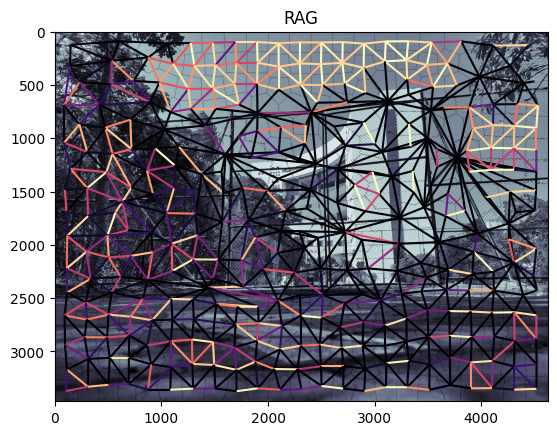

In [10]:
# Displaying the graph

graph.show_rag(labels1, g, img)
plt.title('RAG')

In [11]:
# Performing normalized cut on the RAG

labels2 = graph.cut_normalized(labels1, g)

In [12]:
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

In [13]:
labels2.shape

(3468, 4624)

In [14]:
out2.shape

(3468, 4624, 3)

In [15]:
len(np.unique(labels2))

33

Text(0.5, 1.0, 'segmented image - using n cut')

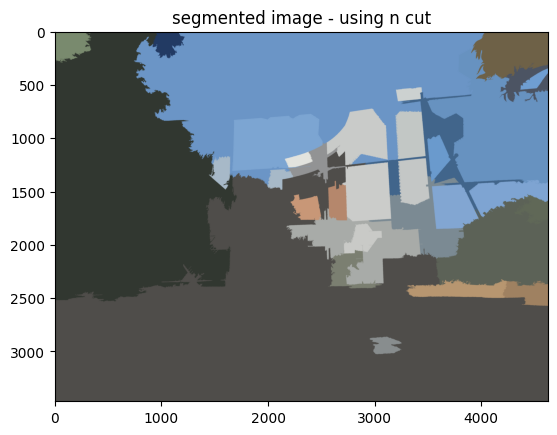

In [13]:
plt.imshow(out2)
plt.title("segmented image - using n cut")

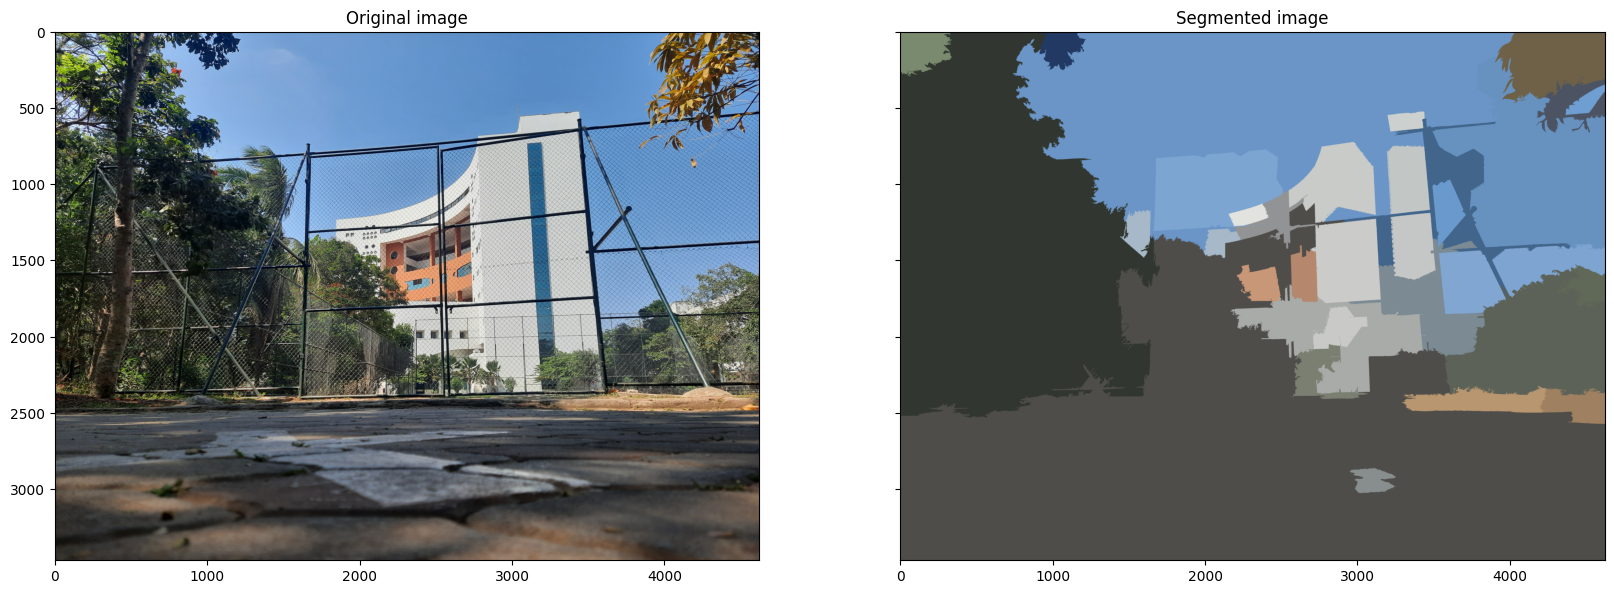

In [19]:
# Comparing the original image with the segmented image

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 8))
a1 = ax[0].imshow(img)
a2 = ax[1].imshow(out2)
ax[0].set_title('Original image')
ax[1].set_title('Segmented image')
plt.show()

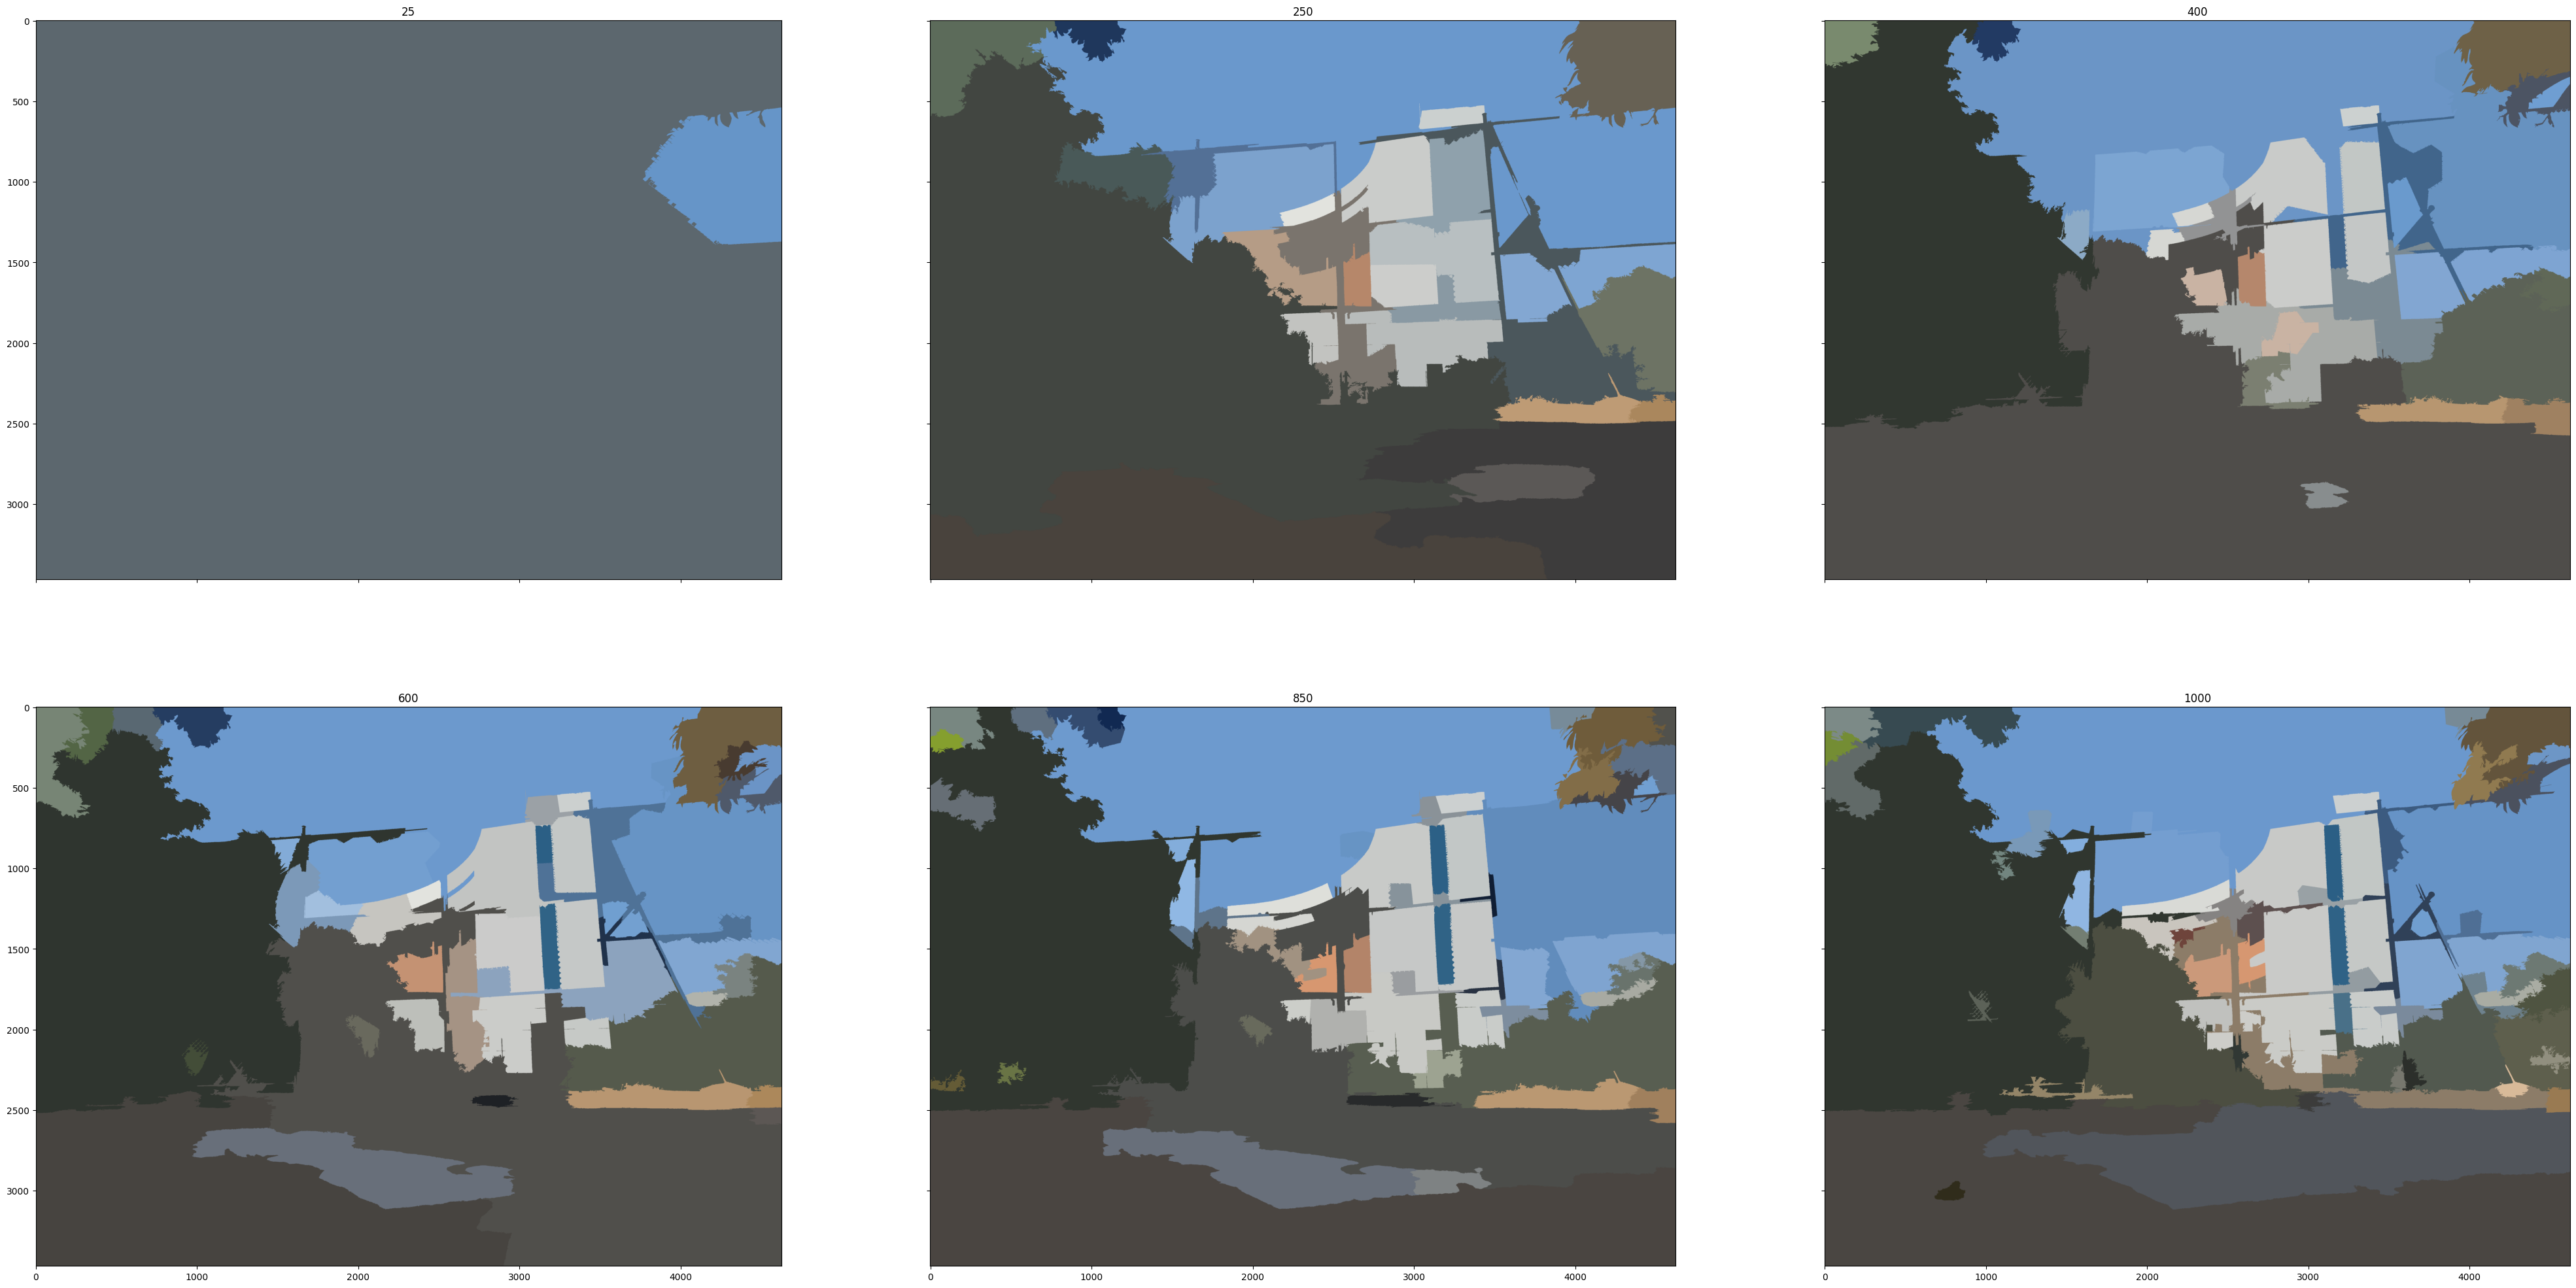

In [24]:
# Performing the same process for different number of segments.

nsegments = [25,250,400,600,850,1000]
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(50, 25))
a=0
b=0
for nsegment in nsegments:
    labels1 = segmentation.slic(img, compactness=30, n_segments=nsegment, start_label=1)
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g)
    out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
    
    ax[a,b].imshow(out)
    ax[a,b].set_title(nsegment)

    if b<2:
        b = b+1
    else:
        b = 0
        a = a+1